In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanicdata = pd.read_csv('train.csv')

In [ ]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanicdata["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanicdata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-6-9cf39056ed23>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanicdata.corr(), cmap = "YlGnBu", annot = True)


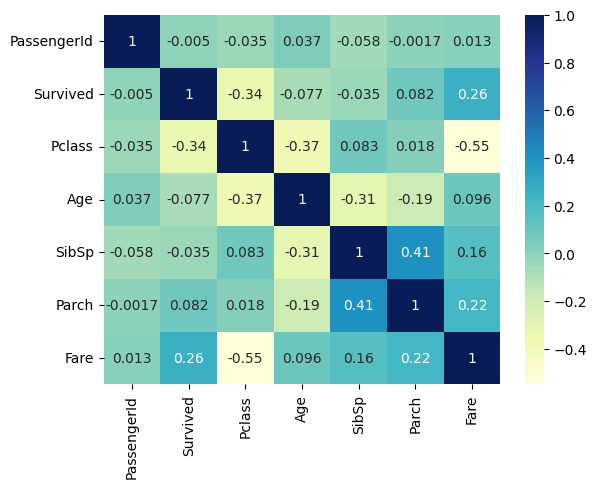

In [ ]:
# look at the corelation of the dataset

import seaborn as sns

sns.heatmap(titanicdata.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20)
for train_indices, test_indices in split.split(titanicdata, titanicdata[['Survived','Pclass', 'Sex']]):
  start_train_set = titanicdata.loc[train_indices]
  start_test_set = titanicdata.loc[test_indices]

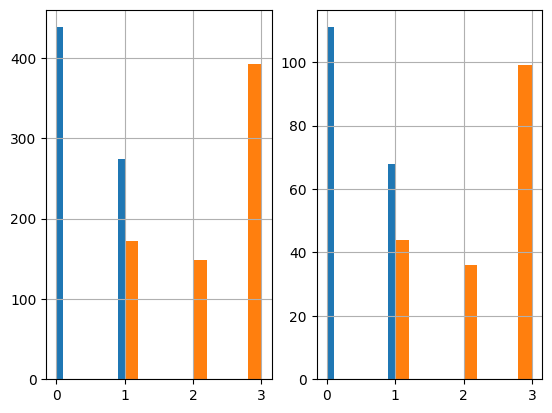

In [ ]:
plt.subplot(1,2,1)
start_train_set["Survived"].hist()
start_train_set["Pclass"].hist()

plt.subplot(1,2,2)
start_test_set["Survived"].hist()
start_test_set["Pclass"].hist()

plt.show()


# check the similar distribution in train dataset and test dataset

In [ ]:
# when comparing the above both graph have similar distribution

start_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 855
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          568 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer  # Impute basically mean consider the missing values we have fill them and how to do them

class AgeImputer(BaseEstimator, TransformerMixin):

  def fit(self, x, y = None):
    return self

  def transform(self, x):
    imputer = SimpleImputer(strategy = "mean")
    x['Age'] = imputer.fit_transform(x[["Age"]])
    return x


In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator,TransformerMixin):

  def fit(self, x, y = None):
    return self

  def transform(self, x):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(x[["Embarked"]]).toarray()

    column_names = ['C', 'S', 'Q', 'N']

    for i in range(len(matrix.T)):
      x[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(x[['Sex']]).toarray()

    column_names = ["Female", "Male"]

    for i in range(len(matrix.T)):
      x[column_names[i]] = matrix.T[i]

    return x


In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):

  def fit(self, x, y = None):
    return self

  def transform(self, x):
    return x.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex","N"], axis = 1, errors = "ignore")

In [ ]:
# pipeline

from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper", FeatureDropper())])


In [ ]:
start_train_set = pipeline.fit_transform(start_train_set)

In [ ]:
start_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
602,603,0,1,29.866637,0,0,42.4000,0.0,0.0,1.0,0.0,1.0
246,247,0,3,25.000000,0,0,7.7750,0.0,0.0,1.0,1.0,0.0
865,866,1,2,42.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
671,672,0,1,31.000000,1,0,52.0000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,1,1,24.000000,0,0,83.1583,1.0,0.0,0.0,1.0,0.0
239,240,0,2,33.000000,0,0,12.2750,0.0,0.0,1.0,0.0,1.0
481,482,0,2,29.866637,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
240,241,0,3,29.866637,1,0,14.4542,1.0,0.0,0.0,1.0,0.0


In [ ]:
start_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 855
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

x = start_train_set.drop(['Survived', 'PassengerId'], axis = 1)
y = start_train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()

In [ ]:
x_data

array([[ 0.82789342, -0.61114492,  0.4499184 , ...,  0.61848547,
        -0.73561236,  0.73561236],
       [-1.56828591,  0.        , -0.47860885, ...,  0.61848547,
        -0.73561236,  0.73561236],
       [ 0.82789342, -0.37808031, -0.47860885, ...,  0.61848547,
         1.35941164, -1.35941164],
       ...,
       [-0.37019624,  0.        , -0.47860885, ...,  0.61848547,
        -0.73561236,  0.73561236],
       [ 0.82789342,  0.        ,  0.4499184 , ..., -1.61685287,
         1.35941164, -1.35941164],
       [ 0.82789342, -0.92189774, -0.47860885, ...,  0.61848547,
         1.35941164, -1.35941164]])

In [ ]:
y_data

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    { "n_estimators": [10,200,500,600,1000], "max_depth":[None, 5,10], "min_samples_split":[2,2,4]}
]

grid_search = GridSearchCV(clf, param_grid, cv = 3 , scoring = "accuracy", return_train_score = True)
grid_search.fit(x_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 2, 4],
                          'n_estimators': [10, 200, 500, 600, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, n_estimators=600)

In [ ]:
start_test_set = pipeline.fit_transform(start_test_set)

In [ ]:
x_test = start_test_set.drop(["Survived", "PassengerId"], axis = 1)
y_test = start_test_set['Survived']

scaler = StandardScaler()
x_data_set_test = scaler.fit_transform(x_test)
y_data_set_test = y_test.to_numpy()

x_data_set_test


array([[ 0.82534717,  0.        , -0.46225359, ...,  0.62257281,
        -0.74600385,  0.74600385],
       [ 0.82534717, -0.30079352, -0.46225359, ..., -1.60623784,
        -0.74600385,  0.74600385],
       [ 0.82534717,  0.        , -0.46225359, ..., -1.60623784,
         1.34047566, -1.34047566],
       ...,
       [ 0.82534717, -0.52374681, -0.46225359, ...,  0.62257281,
        -0.74600385,  0.74600385],
       [ 0.82534717, -0.37511128, -0.46225359, ...,  0.62257281,
        -0.74600385,  0.74600385],
       [ 0.82534717,  0.        , -0.46225359, ...,  0.62257281,
        -0.74600385,  0.74600385]])

In [ ]:
final_clf.score(x_data_set_test, y_data_set_test)

0.8268156424581006

In [ ]:
# get all the data and get the accuracy

titanicdata = pipeline.fit_transform(titanicdata)

In [ ]:
titanicdata

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
titanicdata["Q"].value_counts()

1.0    644
0.0    247
Name: Q, dtype: int64

In [ ]:
x_final = titanicdata.drop(["Survived", "PassengerId"], axis = 1)
y_final = titanicdata['Survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(x_final)
y_data_final = y_final.to_numpy()

x_data_final_df = pd.DataFrame(x_data_final)
y_data_final_df = pd.DataFrame(y_data_final)

In [ ]:
prod_clf = RandomForestClassifier()

param_grid = [
    { "n_estimators": [10,200,500,600,1000], "max_depth":[None, 5,10], "min_samples_split":[2,2,4]}
]

grid_search = GridSearchCV(prod_clf, param_grid,cv = 3, scoring = "accuracy", return_train_score = True)
grid_search.fit(x_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 2, 4],
                          'n_estimators': [10, 200, 500, 600, 1000]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=10, n_estimators=500)

In [ ]:
# Read the test data set

titanictestdata = pd.read_csv("test.csv")
testdata = titanictestdata.drop(["PassengerId"], axis = 1)

In [ ]:
final_test_data = pipeline.fit_transform(testdata)
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    417 non-null    float64
 5   C       418 non-null    float64
 6   S       418 non-null    float64
 7   Q       418 non-null    float64
 8   Female  418 non-null    float64
 9   Male    418 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 32.8 KB


In [ ]:
x_final_test = final_test_data
x_final_test = x_final_test.fillna(method = "ffill")  # filling method is forward filling

scaler = StandardScaler()
x_data_final_test = scaler.fit_transform(x_final_test)

x_final_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   C       418 non-null    float64
 6   S       418 non-null    float64
 7   Q       418 non-null    float64
 8   Female  418 non-null    float64
 9   Male    418 non-null    float64
dtypes: float64(7), int64(3)
memory usage: 32.8 KB


In [ ]:
predictions = prod_final_clf.predict(x_data_final_test)
final_df = prod_final_clf.predict(x_data_final_test)

In [ ]:
final_df = pd.DataFrame(titanictestdata['PassengerId'])
final_df['Survived'] = predictions

final_df.to_csv("predictions 03.csv", index = False)

In [ ]:
# titanicdata -> train data set
# final_test_data -> test data set

# **Titanic Prediction using Keras - Deep Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# model = Sequential()
# model.add(Dense(32, activation = 'relu', input_shape=(10, )))
# model.add(Dropout(rate = 0.2))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(rate = 0.2))
# model.add(Dense(5, activation = 'relu'))
# model.add(Dropout(rate = 0.2))
# model.add(Dense(1, activation = 'sigmoid'))

# model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])

# model_train = model.fit(x_data_final_df, y_data_final_df, epochs = 200,batch_size = 1, verbose = 0, validation_split = 0.2)

# plt.plot(model_train.history['accuracy'],label = "train")
# plt.plot(model_train.history['val_accuracy'], label = "test")
# plt.title("Model Accuracy")
# plt.xlabel("Epoch number")
# plt.ylabel("Accuracy")
# plt.legend(loc='lower right')
# plt.show()

In [ ]:

# # Define a list of values for epoch, batch_size, and verbose
# epochs_list = [50, 100, 150, 200]
# batch_sizes_list = [1, 16, 32, 64]
# verboses_list = [0, 1, 2]

# # Initialize variables to store best configuration and accuracy
# best_epoch = None
# best_batch_size = None
# best_verbose = None
# best_accuracy = 0.0

# # Initialize variables to store train and validation accuracy history for best configuration
# best_train_accuracy_history = None
# best_val_accuracy_history = None

# # Iterate through all combinations of epoch, batch_size, and verbose
# for epochs in epochs_list:
#     for batch_size in batch_sizes_list:
#         for verbose in verboses_list:
#             # Create and compile the model
#             model = Sequential()
#             model.add(Dense(32, activation='relu', input_shape=(10,)))
#             model.add(Dense(32, activation='relu'))
#             model.add(Dense(5, activation='relu'))
#             model.add(Dense(1, activation='sigmoid'))
#             model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#             # Fit the model and get accuracy
#             model_train = model.fit(x_data_final_df, y_data_final_df, epochs=epochs, batch_size=batch_size, verbose=verbose, validation_split=0.2)
#             accuracy = max(model_train.history['val_accuracy'])

#             # Update best configuration and accuracy if necessary
#             if accuracy > best_accuracy:
#                 best_epoch = epochs
#                 best_batch_size = batch_size
#                 best_verbose = verbose
#                 best_accuracy = accuracy
#                 best_train_accuracy_history = model_train.history['accuracy']
#                 best_val_accuracy_history = model_train.history['val_accuracy']

# # Print the best configuration and accuracy
# print("Best Epoch: ", best_epoch)
# print("Best Batch Size: ", best_batch_size)
# print("Best Verbose: ", best_verbose)
# print("Best Accuracy: ", best_accuracy)

# # Plot the accuracy curves for train and test data using the best configuration
# plt.plot(best_train_accuracy_history, label="train")
# plt.plot(best_val_accuracy_history, label="test")
# plt.title("Model Accuracy")
# plt.xlabel("Epoch number")
# plt.ylabel("Accuracy")
# plt.legend(loc='lower right')
# plt.show()




<ipython-input-74-b27254f0271e>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/30
8/8 [==============================] - 3s 9ms/step - loss: 0.6728 - accuracy: 0.5775
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 0.5812 - accuracy: 0.7933
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.4940 - accuracy: 0.8045
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.4308 - accuracy: 0.8135
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.4070 - accuracy: 0.8180
Epoch 6/30
8/8 [==============================] - 0s 7ms/step - loss: 0.3909 - accuracy: 0.8180
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.3741 - accuracy: 0.8337
Epoch 8/30
8/8 [==============================] - 0s 7ms/step - loss: 0.3616 - accuracy: 0.8449
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.3553 - accuracy: 0.8427
Epoch 10/30
8/8 [==============================] - 0s 6ms/step - loss: 0.3476 - accuracy: 0.8494
Epoch 11/30
8/8 [======================

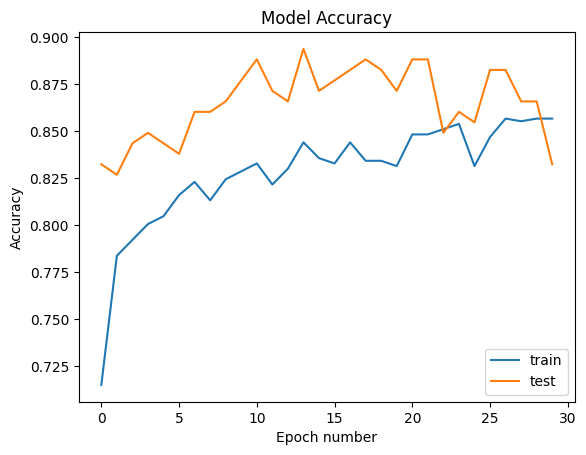

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Define the create_model function to create the model with given hyperparameter values
def create_model(epochs, batch_size):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(10,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create an instance of KerasClassifier with create_model as the model-building function
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameter grid for search
param_grid = {
    'epochs': [30],
    'batch_size': [60],
}

# Create an instance of GridSearchCV
  grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

# Fit the grid search to the data
grid_result = grid.fit(x_data_final_df, y_data_final_df)

# Get the best configuration and accuracy
best_epoch = grid_result.best_params_['epochs']
best_batch_size = grid_result.best_params_['batch_size']
best_accuracy = grid_result.best_score_

# Print the best configuration and accuracy
print("Best Epoch: ", best_epoch)
print("Best Batch Size: ", best_batch_size)
print("Best Accuracy: ", best_accuracy)

# Plot the accuracy curves for train and test data using the best configuration
best_model = create_model(best_epoch, best_batch_size)
model_train = best_model.fit(x_data_final_df, y_data_final_df, epochs=best_epoch, batch_size=best_batch_size, verbose= 0, validation_split=0.10)
plt.plot(model_train.history['accuracy'], label="train")
plt.plot(model_train.history['val_accuracy'], label="test")
plt.title("Model Accuracy")
plt.xlabel("Epoch number")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()


In [ ]:
# model evaluation from the test data

x_data_final_test_df = pd.DataFrame(x_data_final_test)

predictionAnn = best_model.predict(x_data_final_test_df)
predictionAnn_df = predictionAnn

predictionAnn_df = pd.DataFrame(titanictestdata['PassengerId'])
predictionAnn_df["Survived"] = predictionAnn

# save the final result to the csv file data

# predictionAnn_df.to_csv("predictionANN05.csv", index = False)

14/14 [==============================] - 0s 2ms/step


In [ ]:
predictionAnn_df['Survived'] = np.where(predictionAnn_df['Survived'] >=0.5 , 1,0)
predictionAnn_df.to_csv("predictionANN_10.csv", index = False)
